# Criar modelo preditivo

## Definindo os atributos que serão utilizados no modelo preditivo 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('voos_GRU_SDU.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.loc[:, ['ICAO Empresa Aérea',
                'Hora Partida',
                'Número Voo',
                'Dia Mês', #piora sutil
                'Mês', #piora muito
                'Dia Semana', #piora sutil
                'Tipo da nuvem da primeira camada', #piora sutil
                'DireÇõÇo do Vento (0-360)', #sem diferença
                'Veloc. do Vento (m/s)', #piora sutil
                'Alt. da base das nuvens na primeira camada (m)', #melhora sutil <30min
                'Cobertura de nuvens da camada mais restrita(%)', #melhora sutil <30min, redundante com outra cobertura
                #'Cobertura de nuvens da primeira camada (oitavos)', #melhora sutil <30min, redundante com outra cobertura
                'PressÇo reduzida ao nÇðvel do mar - QNH( hPa)', #melhora sutil <30min
                'Temp. do ar (C)', #piora
                'Temp. do Ponto de Orvalho (C)', #sem diferença
                'Visibilidade horizontal (m) (acima de 10000m VV=10000)', #sem diferença
                'Tempo Presente (Tabela 020003) <a href="http://bancodedados.cptec.inpe.br/~rbanco/bdm/tabela_bufr_20003.pdf">Detalhes</a>',
                'Atraso']]

df0 = df

print(df.shape)
df.head()

(2599, 17)


,ICAO Empresa Aérea,Hora Partida,Número Voo,Dia Mês,Mês,Dia Semana,Tipo da nuvem da primeira camada,DireÇõÇo do Vento (0-360),Veloc. do Vento (m/s),Alt. da base das nuvens na primeira camada (m),Cobertura de nuvens da camada mais restrita(%),PressÇo reduzida ao nÇðvel do mar - QNH( hPa),Temp. do ar (C),Temp. do Ponto de Orvalho (C),Visibilidade horizontal (m) (acima de 10000m VV=10000),"Tempo Presente (Tabela 020003) <a href=""http://bancodedados.cptec.inpe.br/~rbanco/bdm/tabela_bufr_20003.pdf"">Detalhes</a>",Atraso
0,AZU,6.250000,2400,1,Janeiro,Segunda,0.0,330.0,2.57,173.0,6.0,1013.89,21.0,20.0,10000.0,0.0,21
1,GLO,8.083333,1076,1,Janeiro,Segunda,0.0,310.0,2.06,156.0,2.0,1013.89,20.0,20.0,10000.0,0.0,0
2,TAM,8.666667,4605,1,Janeiro,Segunda,0.0,310.0,2.06,156.0,2.0,1013.89,20.0,20.0,10000.0,0.0,0
3,GLO,10.250000,1078,1,Janeiro,Segunda,0.0,310.0,4.63,172.0,3.0,1013.89,22.0,20.0,10000.0,0.0,0
4,AZU,13.750000,2402,1,Janeiro,Segunda,0.0,330.0,5.15,173.0,6.0,1014.91,24.0,20.0,10000.0,0.0,-3


## Definindo atributos tipo categoria

In [2]:
df = df0

df = pd.get_dummies(df, columns=['ICAO Empresa Aérea',
                                 'Número Voo',
                                 'Dia Mês',
                                 'Mês',
                                 'Dia Semana',
                                 'Tipo da nuvem da primeira camada',
                                 'DireÇõÇo do Vento (0-360)',
                                 'Cobertura de nuvens da camada mais restrita(%)',
                                 #'Cobertura de nuvens da primeira camada (oitavos)',
                                 'Tempo Presente (Tabela 020003) <a href="http://bancodedados.cptec.inpe.br/~rbanco/bdm/tabela_bufr_20003.pdf">Detalhes</a>',
                                ]) #RTBF

df1 = df

print('Tabela com ' + str(df.shape[0]) + ' linhas e ' + str(df.shape[1]) + ' colunas.')
df.head()
#display(df)

Tabela com 2599 linhas e 147 colunas.


,Hora Partida,Veloc. do Vento (m/s),Alt. da base das nuvens na primeira camada (m),PressÇo reduzida ao nÇðvel do mar - QNH( hPa),Temp. do ar (C),Temp. do Ponto de Orvalho (C),Visibilidade horizontal (m) (acima de 10000m VV=10000),Atraso,ICAO Empresa Aérea_AZU,ICAO Empresa Aérea_GLO,...,"Tempo Presente (Tabela 020003) <a href=""http://bancodedados.cptec.inpe.br/~rbanco/bdm/tabela_bufr_20003.pdf"">Detalhes</a>_10.0","Tempo Presente (Tabela 020003) <a href=""http://bancodedados.cptec.inpe.br/~rbanco/bdm/tabela_bufr_20003.pdf"">Detalhes</a>_12.0","Tempo Presente (Tabela 020003) <a href=""http://bancodedados.cptec.inpe.br/~rbanco/bdm/tabela_bufr_20003.pdf"">Detalhes</a>_17.0","Tempo Presente (Tabela 020003) <a href=""http://bancodedados.cptec.inpe.br/~rbanco/bdm/tabela_bufr_20003.pdf"">Detalhes</a>_51.0","Tempo Presente (Tabela 020003) <a href=""http://bancodedados.cptec.inpe.br/~rbanco/bdm/tabela_bufr_20003.pdf"">Detalhes</a>_53.0","Tempo Presente (Tabela 020003) <a href=""http://bancodedados.cptec.inpe.br/~rbanco/bdm/tabela_bufr_20003.pdf"">Detalhes</a>_61.0","Tempo Presente (Tabela 020003) <a href=""http://bancodedados.cptec.inpe.br/~rbanco/bdm/tabela_bufr_20003.pdf"">Detalhes</a>_63.0","Tempo Presente (Tabela 020003) <a href=""http://bancodedados.cptec.inpe.br/~rbanco/bdm/tabela_bufr_20003.pdf"">Detalhes</a>_65.0","Tempo Presente (Tabela 020003) <a href=""http://bancodedados.cptec.inpe.br/~rbanco/bdm/tabela_bufr_20003.pdf"">Detalhes</a>_95.0","Tempo Presente (Tabela 020003) <a href=""http://bancodedados.cptec.inpe.br/~rbanco/bdm/tabela_bufr_20003.pdf"">Detalhes</a>_97.0"
0,6.250000,2.57,173.0,1013.89,21.0,20.0,10000.0,21,1,0,...,0,0,0,0,0,0,0,0,0,0
1,8.083333,2.06,156.0,1013.89,20.0,20.0,10000.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8.666667,2.06,156.0,1013.89,20.0,20.0,10000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.250000,4.63,172.0,1013.89,22.0,20.0,10000.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,13.750000,5.15,173.0,1014.91,24.0,20.0,10000.0,-3,1,0,...,0,0,0,0,0,0,0,0,0,0


## Separar amostras em Treino e Teste

In [22]:
train_test_split = 0.5

i_train = int(df.shape[0]*train_test_split)
#print(i_train)

Y_train = df.loc[0:i_train , 'Atraso']
Y_test  = df.loc[i_train+1:, 'Atraso']
X_train = df.loc[0:i_train ].drop(columns=['Atraso'])
X_test  = df.loc[i_train+1:].drop(columns=['Atraso'])

print('Amostras de treino = ' + str(Y_train.shape[0]) + ', teste = ' + str(Y_test.shape[0]))

'''
from sklearn.model_selection import train_test_split

Y = df.loc[:, 'Atraso']
X = df.drop(columns=['Atraso'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

print('Amostra de teste com ' + str(Y_test.shape[0]) + ' linhas.')
'''

Amostras de treino = 1300, teste = 1299


"\nfrom sklearn.model_selection import train_test_split\n\nY = df.loc[:, 'Atraso']\nX = df.drop(columns=['Atraso'])\n\nX_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)\n\nprint('Amostra de teste com ' + str(Y_test.shape[0]) + ' linhas.')\n"

## Criar modelos candidatos

In [13]:
from sklearn import tree
from sklearn import svm
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
import math

clfs = []
clfs = [None, #naive guess
        tree.DecisionTreeRegressor(),
        RandomForestRegressor(criterion='mse'),
        svm.SVR(kernel='rbf'),
        ensemble.GradientBoostingRegressor()
        ]

legends = []
i_best = 0
results = {}
for i in range(len(clfs)):
    results[i] = {}
        
    if clfs[i] is None:
        results[i]['Y_pred'] = Y_test*0 #predict all flight delays as nulls
        legends.append('Naïve Guess')
    else:
        clfs[i].fit(X_train, Y_train)
        results[i]['Y_pred'] = clfs[i].predict(X_test)
        legends.append(clfs[i].__class__.__name__)
        
    results[i]['MSE'] = round(mean_squared_error(Y_test, results[i]['Y_pred']), 1)
    results[i]['MAE'] = round(abs(Y_test - results[i]['Y_pred']).sum() / Y_test.shape[0], 1)
    
    if results[i_best]['MSE'] > results[i]['MSE']:
        i_best = i
        
    print(str(i) +
          ': MSE = ' + str(results[i]['MSE']) +
          ', MAE = ' + str(results[i]['MAE']) +
          ', model = ' + legends[i]
         )

0: MSE = 550.8, MAE = 14.3, model = Naïve Guess
1: MSE = 646.2, MAE = 15.9, model = DecisionTreeRegressor
2: MSE = 547.3, MAE = 13.7, model = RandomForestRegressor
3: MSE = 552.4, MAE = 13.9, model = SVR
4: MSE = 518.9, MAE = 12.9, model = GradientBoostingRegressor


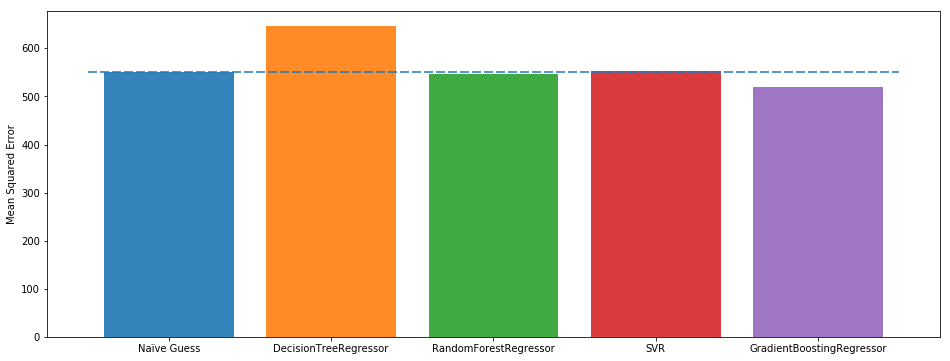

<function matplotlib.pyplot.bar>

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 6))
plt.plot([-0.5, len(clfs)-0.5], [results[0]['MSE'], results[0]['MSE']], dashes=[6, 2])
plt.plot()
for i in range(len(clfs)):
    plt.bar(i, results[i]['MSE'], align='center', alpha=0.9)
    #plt.xticks(y_pos, objects)
    #plt.title('Programming language usage')

legends[0]='Naïve Guess'
plt.ylabel('Mean Squared Error')
plt.xticks(np.arange(len(clfs)), legends)
#plt.legend(legends, bbox_to_anchor=(1.1, 1.05), prop={'size': 16})
plt.show()
    
plt.bar

## Selecionar melhor modelo candidato e refinar

### Refinamento por escolha aleatória de Hyperparâmetros

In [15]:
from sklearn.model_selection import RandomizedSearchCV

i = i_best
clf = clfs[i_best]

print('THE BEST CANDIDATE MODEL')
print('MSE = ' + str(results[i]['MSE']))
print('MAE = ' + str(results[i]['MAE']))
print('model = ' + legends[i])

param_dist = {'learning_rate': [.9, .001],
              'n_estimators': [1, 1000],
              'max_depth': [2, 10],
              'min_samples_split': [2, 50],
              #'cv': [5],
             }

rand_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=9, cv=5)
rand_search.fit(X_train, Y_train)
Y_pred = rand_search.predict(X_test)
#scores = CV.cross_val_score(grid_search, X_test, Y_test, cv=10, scoring='mean_squared_error')

print('')
print('THE BEST RANDOM MODEL')
#print('Score:  ' + str(-int(grid_search.best_score_)))
print('MSE:    ' + str(round(mean_squared_error(Y_test, Y_pred), 1)))
print('MAE:    ' + str(round(abs(Y_test - results[i]['Y_pred']).sum() / Y_test.shape[0], 1)))
print('Params: ' + str(rand_search.best_params_))

THE BEST CANDIDATE MODEL
MSE = 518.9
MAE = 12.9
model = GradientBoostingRegressor

THE BEST RANDOM MODEL
MSE:    551.3
MAE:    12.9
Params: {'n_estimators': 1, 'min_samples_split': 50, 'max_depth': 10, 'learning_rate': 0.001}


### Refinamento exaustivo por variação em grade de Hyperparâmetros

In [17]:
from sklearn.model_selection import GridSearchCV

if mean_squared_error(Y_test, Y_pred)<results[i]['MSE']:
    clf = rand_search
else:
    clf = clfs[i_best]

Y_pred = clf.predict(X_test)

print('THE BEST PREVIOUS MODEL')
print('MSE = ' + str(round(mean_squared_error(Y_test, results[i]['Y_pred']), 1)))
print('MAE = ' + str(round(abs(Y_test - results[i]['Y_pred']).sum() / Y_test.shape[0], 1)))
#print('model = ' + legends[i])

#params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'} #CAMPEAO

param_grid = {'learning_rate': [clf.get_params()['learning_rate']*.95, clf.get_params()['learning_rate']*1.05],
              'n_estimators': [int(clf.get_params()['n_estimators']*.95), int(clf.get_params()['n_estimators']*1.05)],
              'max_depth': [int(clf.get_params()['max_depth']*.95), int(clf.get_params()['max_depth']*1.05)],
              #'min_samples_split': [max(2, int(clf.get_params()['min_samples_split']*.95)), max(3, int(clf.get_params()['min_samples_split']*1.05))],
              #'cv': [5],
             }

grid_search = GridSearchCV(clf, param_grid=param_grid, scoring='neg_mean_squared_error')#, cv=5)
grid_search.fit(X_train, Y_train)
Y_pred = grid_search.predict(X_test)

print('')
print('THE BEST GRID MODEL')
#print('Score:  ' + str(-int(grid_search.best_score_)))
print('MSE:    ' + str(round(mean_squared_error(Y_test, Y_pred), 1)))
print('MAE:    ' + str(round(abs(Y_test - results[i]['Y_pred']).sum() / Y_test.shape[0], 1)))
print('Params: ' + str(grid_search.best_params_))

THE BEST PREVIOUS MODEL
MSE = 518.9
MAE = 12.9

THE BEST GRID MODEL
MSE:    520.2
MAE:    12.9
Params: {'learning_rate': 0.095, 'max_depth': 2, 'n_estimators': 95}


# Gráficos

Erro absoluto médio em minutos do previsto: 14.3
Erro absoluto médio em minutos da predição: 13.0
Previstos: MSE 23.5 minutos.
Predições: MSE 22.8 minutos.


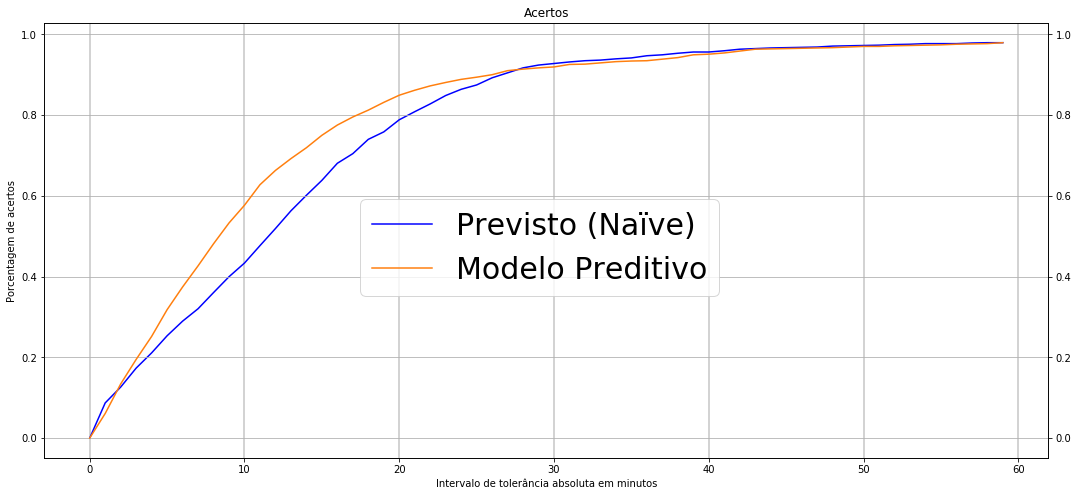

In [18]:
from sklearn.metrics import mean_squared_error
import math

print('Erro absoluto médio em minutos do previsto: ' + str(round(abs(Y_test).sum() / Y_test.shape[0], 1)))
print('Erro absoluto médio em minutos da predição: ' + str(round(abs(Y_test - Y_pred).sum() / Y_test.shape[0], 1)))

mse = mean_squared_error(Y_test, Y_pred*0)
print("Previstos: MSE %.1f minutos." % math.sqrt(mse))
mse = mean_squared_error(Y_test, Y_pred)
print("Predições: MSE %.1f minutos." % math.sqrt(mse))

Desvio = Y_test - Y_pred
faixas = range(0, 60*1)
acertos_prev = []
acertos_pred = []
for faixa in faixas:
    acertos_prev.append(Y_test[abs(Y_test)<faixa].shape[0] / Y_test.shape[0])
    acertos_pred.append(Desvio[abs(Desvio)<faixa].shape[0] / Y_test.shape[0])
    
fig, ax1 = plt.subplots(figsize=(18,8))
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.plot(faixas, acertos_prev, c='b') #plot the Revenue on axis #1
ax2.plot(faixas, acertos_pred, c='C1')
fig.legend(['Previsto (Naïve)', 'Modelo Preditivo'], loc='center', prop={'size': 30})
ax1.set_xlabel('Intervalo de tolerância absoluta em minutos')
ax1.set_ylabel('Porcentagem de acertos')
ax1.set_title('Acertos')
ax1.xaxis.grid(which="major", color='lightgray', linestyle='-', linewidth=2)
plt.grid()

Text(0.5,0,'Atrasos [min]')

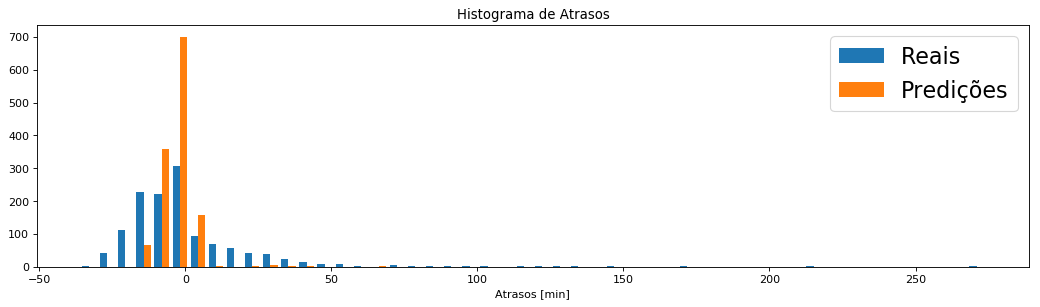

In [19]:
labels = ['Reais', 'Predições']
plt.figure(figsize=(16, 4), dpi=80)
plt.hist([Y_test, Y_pred], 50, label=labels)
plt.legend(prop={'size': 20})
plt.title('Histograma de Atrasos')
plt.xlabel('Atrasos [min]')

Text(0.5,0,'Erros da estimativa de atrasos [min]')

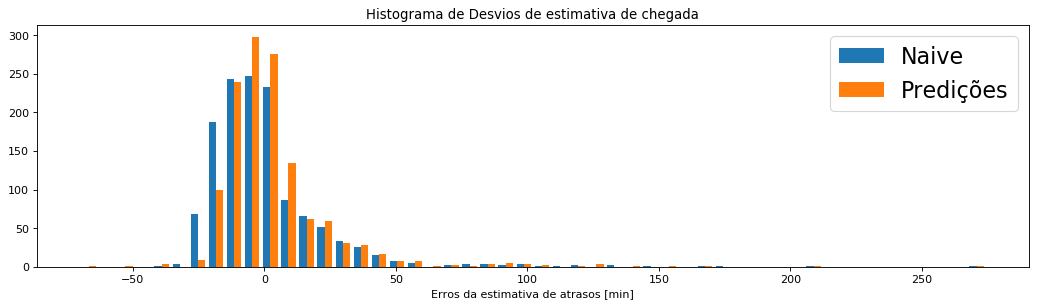

In [20]:
labels = ['Naive', 'Predições']
plt.figure(figsize=(16, 4), dpi=80)
plt.hist([Y_test, Y_test - Y_pred], 50, label=labels)
plt.legend(prop={'size': 20})
plt.title('Histograma de Desvios de estimativa de chegada')
plt.xlabel('Erros da estimativa de atrasos [min]')

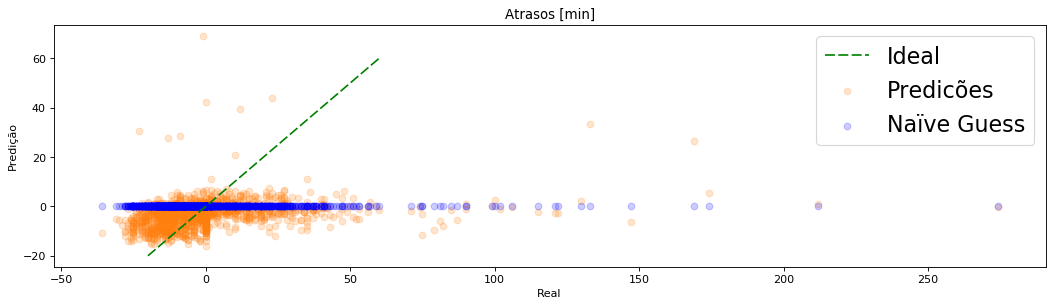

In [21]:
plt.figure(figsize=(16, 4), dpi=80)
plt.scatter(x=Y_test, y=Y_pred, alpha=0.2, c='C1')
plt.scatter(x=Y_test, y=Y_pred*0, alpha=0.2, c='b')
Y_min = min(Y_test.min(), Y_pred.min())
Y_max = min(Y_test.max(), Y_pred.max())
Y_min = -20
Y_max = 60
plt.plot([Y_min, Y_max], [Y_min, Y_max], dashes=[6, 2], c='green')
plt.xlabel('Real')
plt.ylabel('Predição')
plt.title('Atrasos [min]')
plt.legend(['Ideal', 'Predicões', 'Naïve Guess'], prop={'size': 20})